In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
path = "gaming_processed.csv"
df = pd.read_csv(path, encoding='latin1')
df.head()
df.shape

(12716, 25)

In [12]:
df = df.dropna(subset = ["SPIN_T"])
df.isnull().sum()

GADE                    593
Game                      0
Platform                  0
Hours                     0
earnings                  0
whyplay                   0
League                    4
highestleague         12105
streams                  82
Narcissism                9
Gender                    0
Age                       0
Work                     29
Degree                 1412
Birthplace                0
Residence                 0
Reference                11
Playstyle                 0
GAD_T                     0
SWL_T                     0
SPIN_T                    0
Playstyle_category        0
whyplay_category          0
earn_category             0
whyplay_category_2        0
dtype: int64

In [13]:
df.dtypes

GADE                   object
Game                   object
Platform               object
Hours                 float64
earnings               object
whyplay                object
League                 object
highestleague         float64
streams               float64
Narcissism            float64
Gender                 object
Age                     int64
Work                   object
Degree                 object
Birthplace             object
Residence              object
Reference              object
Playstyle              object
GAD_T                   int64
SWL_T                   int64
SPIN_T                float64
Playstyle_category     object
whyplay_category       object
earn_category          object
whyplay_category_2     object
dtype: object

In [14]:
import pandas as pd

# Assuming df is your DataFrame with the "whyplay" column
country_counts = df['League'].value_counts()

# Create a DataFrame from the value counts
country_counts_df = pd.DataFrame({'League': country_counts.index, 'Frequency': country_counts.values})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(country_counts_df)

       League  Frequency
0        gold       2994
1    platinum       2448
2    unranked       2386
3      silver       2066
4     diamond       1480
5      bronze        485
6      master        178
7  challenger         55
8      legend          9


In [15]:
import pandas as pd

# Assuming df is your DataFrame with the "whyplay" column
country_counts = df['Work'].value_counts()

# Create a DataFrame from the value counts
country_counts_df = pd.DataFrame({'League': country_counts.index, 'Frequency': country_counts.values})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(country_counts_df)

                            League  Frequency
0  Student at college / university       6335
1                         Employed       2517
2                Student at school       1972
3        Unemployed / between jobs       1252


In [16]:
from scipy.stats import shapiro

for league in df['League'].unique():
    subset_data = df[df['League'] == league]['Hours']
    
    if len(subset_data) < 3:
        print(f"Insufficient data points for normality test in category: {league}")
    else:
        stat, p_value = shapiro(subset_data)
        print(f"Shapiro-Wilk Test for {league}: statistic={stat:.3f}, p-value={p_value:.4f}")

Shapiro-Wilk Test for unranked: statistic=0.813, p-value=0.0000
Shapiro-Wilk Test for gold: statistic=0.867, p-value=0.0000
Shapiro-Wilk Test for diamond: statistic=0.895, p-value=0.0000
Shapiro-Wilk Test for bronze: statistic=0.805, p-value=0.0000
Shapiro-Wilk Test for silver: statistic=0.855, p-value=0.0000
Shapiro-Wilk Test for legend: statistic=0.956, p-value=0.7522
Shapiro-Wilk Test for master: statistic=0.790, p-value=0.0000
Shapiro-Wilk Test for platinum: statistic=0.899, p-value=0.0000
Shapiro-Wilk Test for challenger: statistic=0.901, p-value=0.0003
Insufficient data points for normality test in category: nan


/tmp/ipykernel_13078/1327146538.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Playstyle_category_encoded'] = le.fit_transform(selected_data['Playstyle_category'])
/tmp/ipykernel_13078/1327146538.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['whyplay_category_2_encoded'] = le.fit_transform(selected_data['whyplay_category_2'])
/tmp/ipykernel_13078/1327146538.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

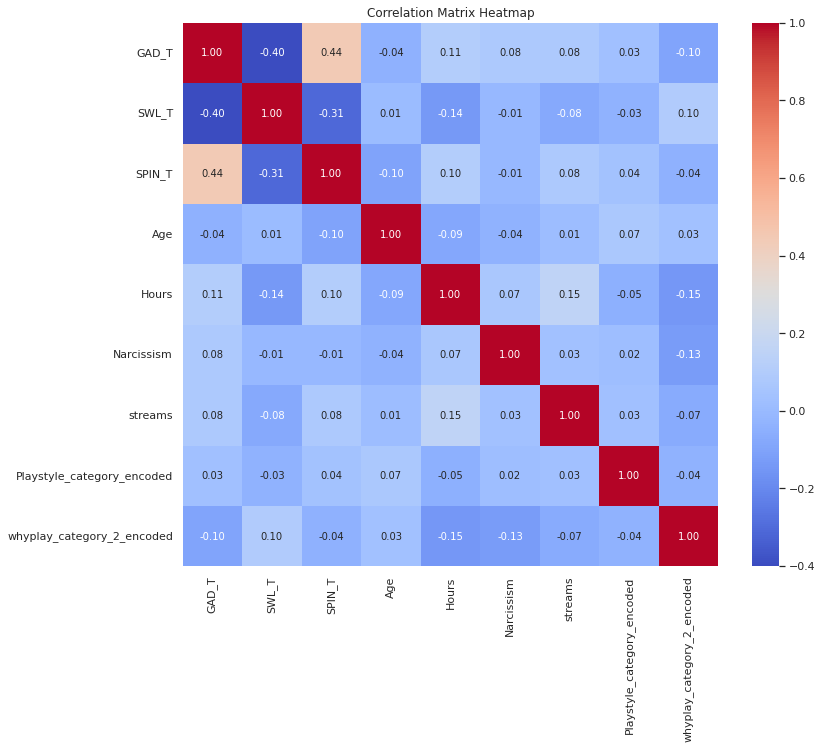

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv("gaming_processed_3.csv")

# Select only the desired variables
selected_variables = ['GAD_T', 'SWL_T', 'SPIN_T', 'Age', 'Hours', 'Narcissism', 'streams', 'Playstyle_category', 'whyplay_category_2']
selected_data = data[selected_variables]

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
selected_data['Playstyle_category_encoded'] = le.fit_transform(selected_data['Playstyle_category'])
selected_data['whyplay_category_2_encoded'] = le.fit_transform(selected_data['whyplay_category_2'])

# Drop original categorical columns
selected_data.drop(['Playstyle_category', 'whyplay_category_2'], axis=1, inplace=True)

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.savefig('corr.png', bbox_inches='tight')
plt.show()

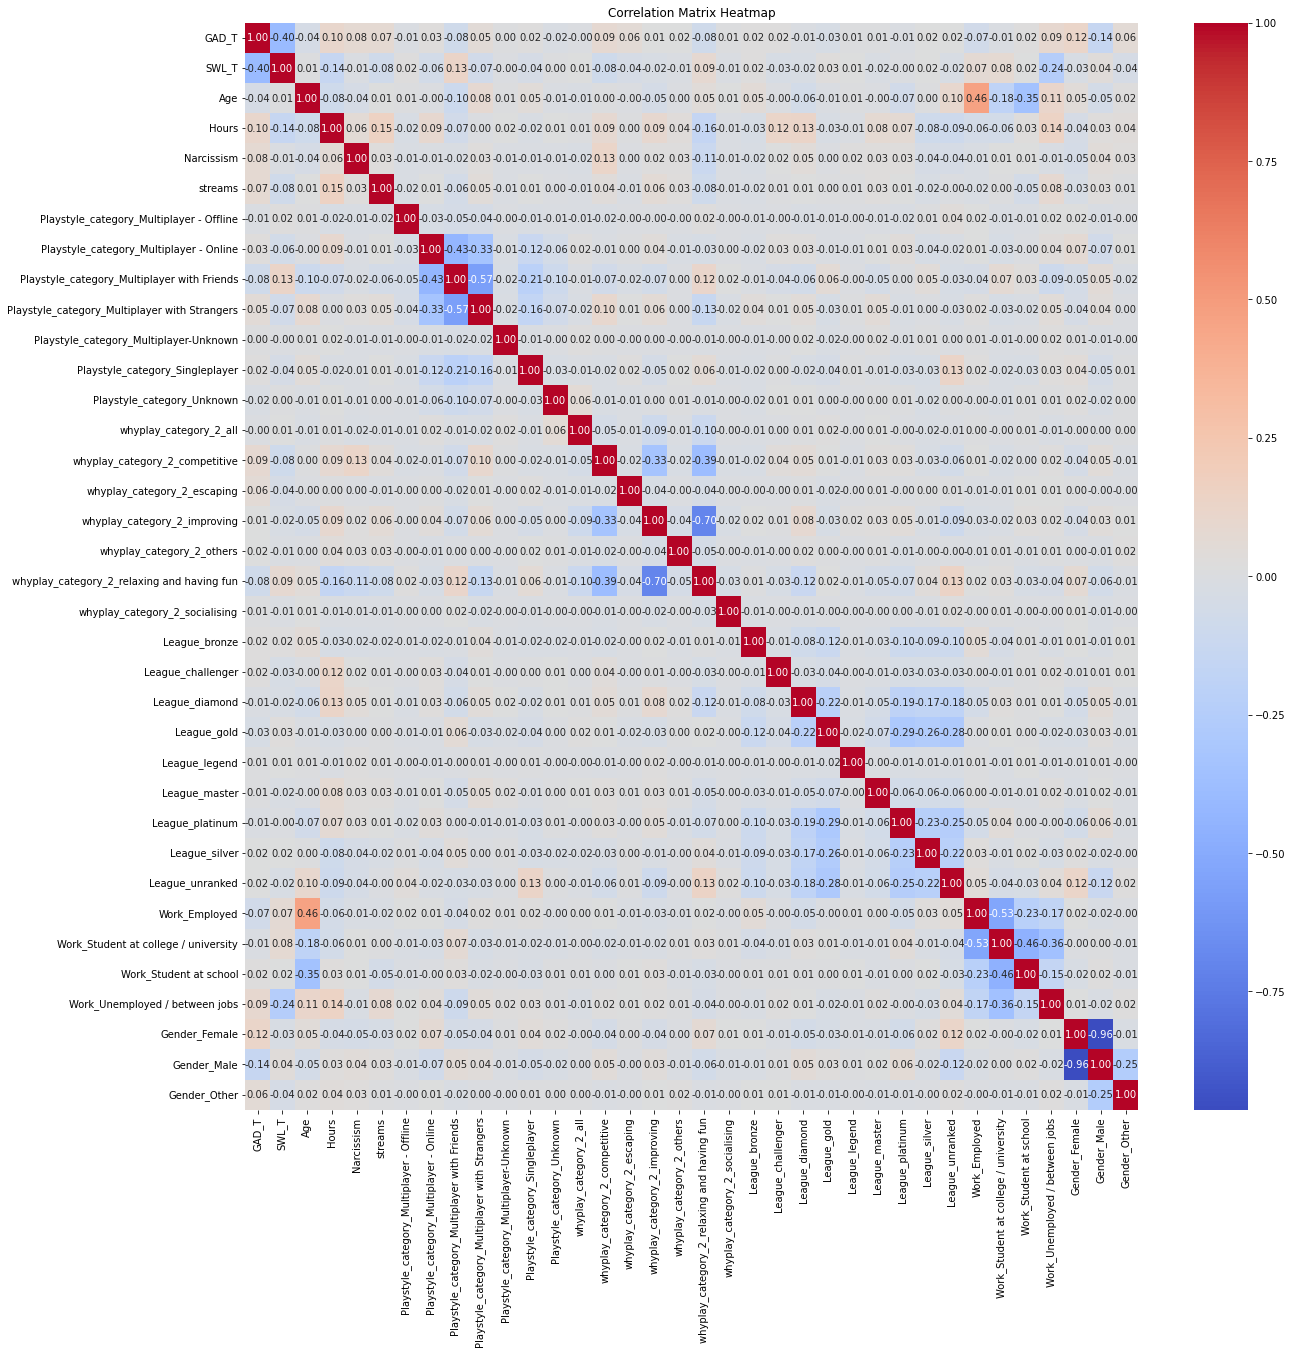

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Load the data
data = pd.read_csv("gaming_processed.csv")

# Select only the desired variables
selected_variables = ['GAD_T', 'SWL_T', 'Age', 'Hours', 'Narcissism', 'streams', 'Playstyle_category', 'whyplay_category_2', 'League', 'Work', 'Gender']
selected_data = data[selected_variables]

# One-hot encode categorical variables
encoded_data = pd.get_dummies(selected_data, columns=['Playstyle_category', 'whyplay_category_2', 'League', 'Work', 'Gender'])

# Calculate the correlation matrix
correlation_matrix = encoded_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()


Whyplay, Hours and league

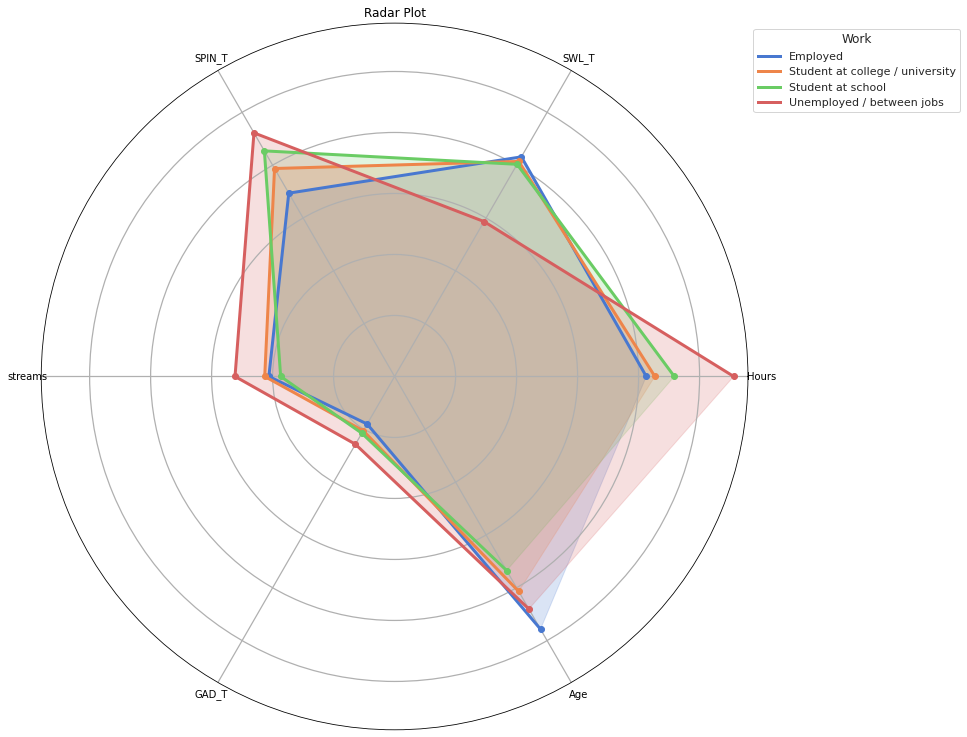

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data
data = pd.read_csv("gaming_processed.csv")
# data = data.dropna['GAD_T']

# Prepare the data
selected_columns = ['Hours', 'SWL_T', 'SPIN_T', 'streams', 'Work', 'GAD_T', 'Age']
data = data[selected_columns]

# Aggregate the data
grouped_data = data.groupby('Work').mean()

# Plot the radar chart
labels = ['Hours', 'SWL_T', 'SPIN_T', 'streams', 'GAD_T', 'Age']
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(20, 13), subplot_kw=dict(polar=True))
plt.title('Radar Plot')

ax.grid(linewidth=1.25)

# colors = ['blue', 'brown', 'green', 'red']
colors = sns.color_palette('muted', n_colors=4)


for i, (idx, row) in enumerate(grouped_data.iterrows()):
    values = row.values.flatten().tolist()
    color = colors[i]  # Get color for this category
    
    # Close the plot
    values += values[:1]
    ax.plot(angles, values[:-1], linewidth=3, linestyle='solid', label=idx, color=color)  # Increase linewidth for sharper lines
    ax.fill(angles, values[:-1], alpha=0.2, color=color)  # Fill area between levels with color

    # Add dot points at the intersection points
    for angle, value in zip(angles, values[:-1]):
        ax.plot(angle, value, 'o', color=color)
        # Add value at each axis
        # ax.text(angle, value, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)

# Set Seaborn style and color palette
ax.spines['polar'].set_color('black')
sns.set(style="whitegrid")

# Add legend
plt.legend(title='Work', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


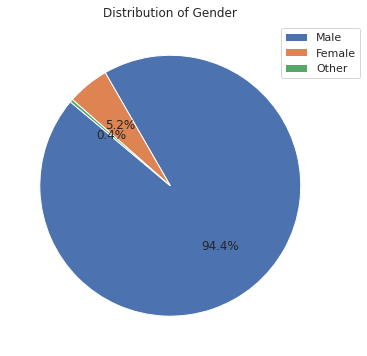

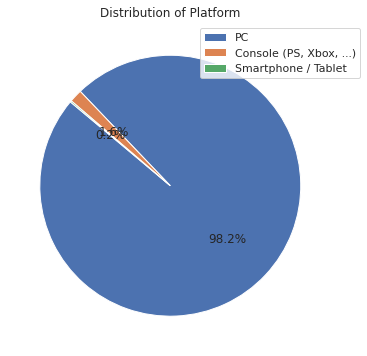

In [33]:
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=None, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.legend(labels=gender_counts.index, loc="upper right", bbox_to_anchor=(1.1, 1))
plt.show()

# Plotting pie chart for Platform
platform_counts = data['Platform'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(platform_counts, labels=None, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Platform')
plt.legend(labels=platform_counts.index, loc="upper right", bbox_to_anchor=(1.1, 1))
plt.show()

In [22]:
import pandas as pd
import plotly.graph_objects as go

# Load the data
data = pd.read_csv("gaming_processed.csv")
# data = data.dropna['GAD_T']

# Prepare the data
selected_columns = ['Hours', 'SPIN_T', 'streams', 'SWL_T', 'Work', 'GAD_T', 'Age']
data = data[selected_columns]

# Aggregate the data
grouped_data = data.groupby('Work').mean()

# Define labels and values for radar chart
labels = ['Hours', 'SPIN_T', 'streams', 'SWL_T', 'GAD_T', 'Age']
categories = grouped_data.index.tolist()
values = grouped_data.values.tolist()

# Convert values to numeric
values = [[float(val) for val in vals] for vals in values]

# Create radar chart
fig = go.Figure()

for i in range(len(categories)):
    fig.add_trace(go.Scatterpolar(
        r=values[i] + values[i][:1],
        theta=labels + labels[:1],
        fill='toself',
        name=categories[i]
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            showticklabels=False,
            range=[0, max([max(vals) for vals in values])]  # Adjust range if needed
        )),
    showlegend=True,
    title='Radar Plot'
)

fig.show()


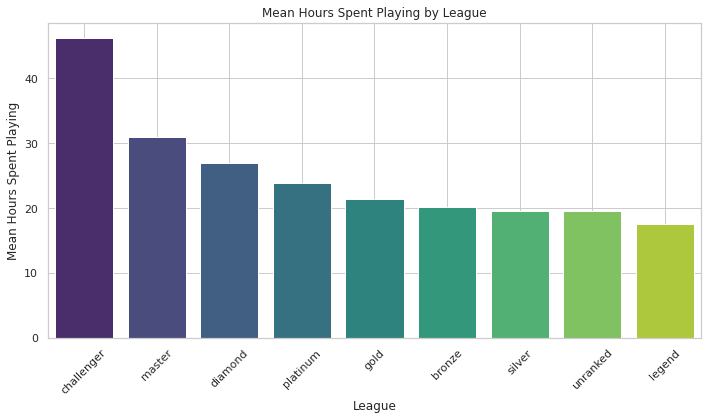

In [23]:
# Step 2: Data Preparation
league_mean_hours = df.groupby('League')['Hours'].mean().reset_index()
league_mean_hours = league_mean_hours.sort_values(by='Hours', ascending=False)


# Step 3: Plotting
plt.figure(figsize=(10, 6))
# plt.bar(league_mean_hours['League'], league_mean_hours['Hours'], color='skyblue')
sns.barplot(data=league_mean_hours, x='League', y='Hours', palette='viridis')
plt.xlabel('League')
plt.ylabel('Mean Hours Spent Playing')
plt.title('Mean Hours Spent Playing by League')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines along y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

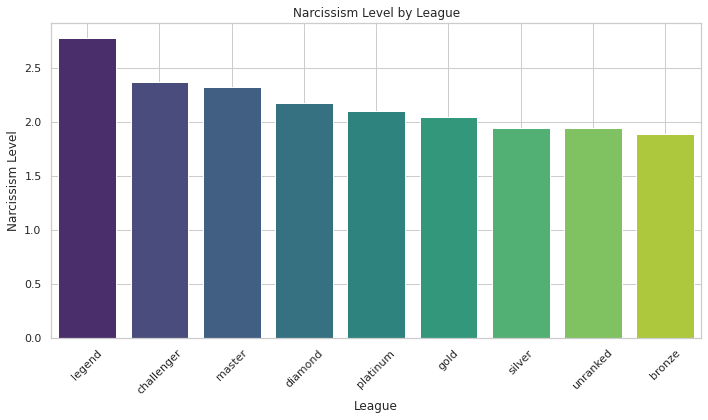

In [24]:
league_mean_hours = df.groupby('League')['Narcissism'].mean().reset_index()
league_mean_hours = league_mean_hours.sort_values(by='Narcissism', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(league_mean_hours, x='League', y='Narcissism', palette='viridis')
plt.xlabel('League')
plt.ylabel('Narcissism Level')
plt.title('Narcissism Level by League')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='x')  # Add grid lines along y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

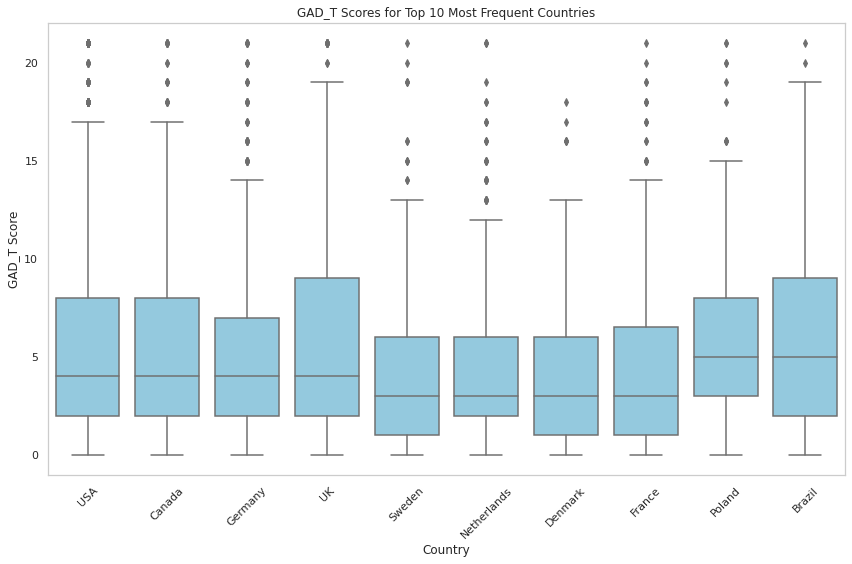

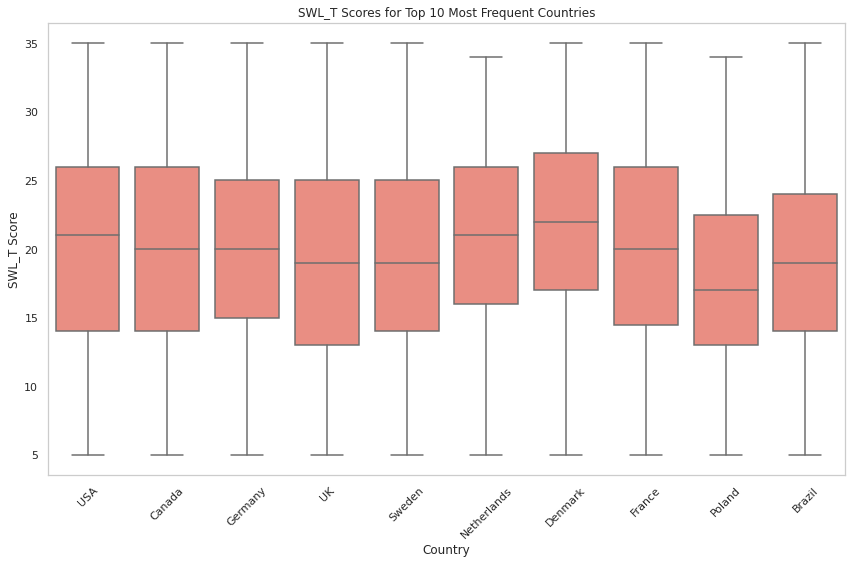

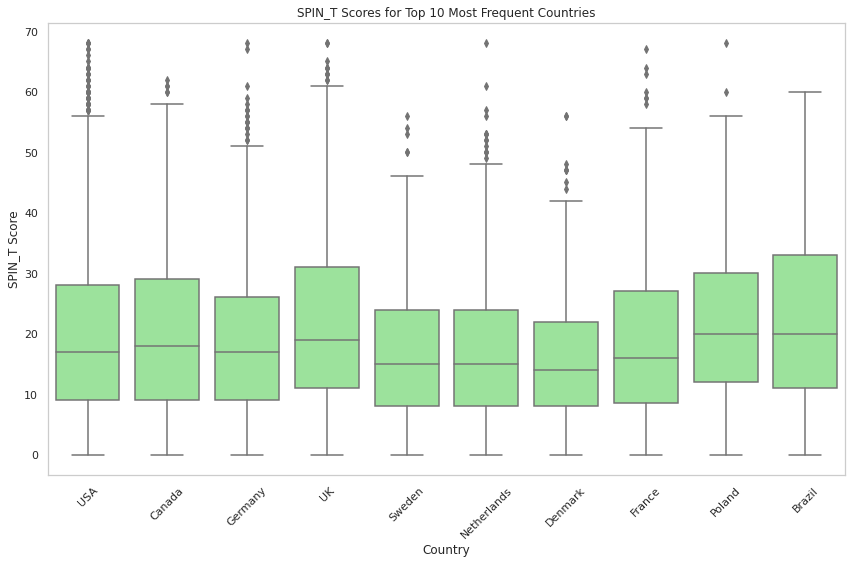

In [25]:
country_counts = df['Residence'].value_counts()

# Step 3: Select the top 10 most frequent countries
top_10_countries = country_counts.head(10).index

# Step 4: Filter the data for the top 10 countries
top_10_data = df[df['Residence'].isin(top_10_countries)]

# Step 5: Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_10_data, x='Residence', y='GAD_T', color='skyblue')
plt.xlabel('Country')
plt.ylabel('GAD_T Score')
plt.title('GAD_T Scores for Top 10 Most Frequent Countries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines along y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=top_10_data, x='Residence', y='SWL_T', color='salmon')
plt.xlabel('Country')
plt.ylabel('SWL_T Score')
plt.title('SWL_T Scores for Top 10 Most Frequent Countries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines along y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=top_10_data, x='Residence', y='SPIN_T', color='lightgreen')
plt.xlabel('Country')
plt.ylabel('SPIN_T Score')
plt.title('SPIN_T Scores for Top 10 Most Frequent Countries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines along y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

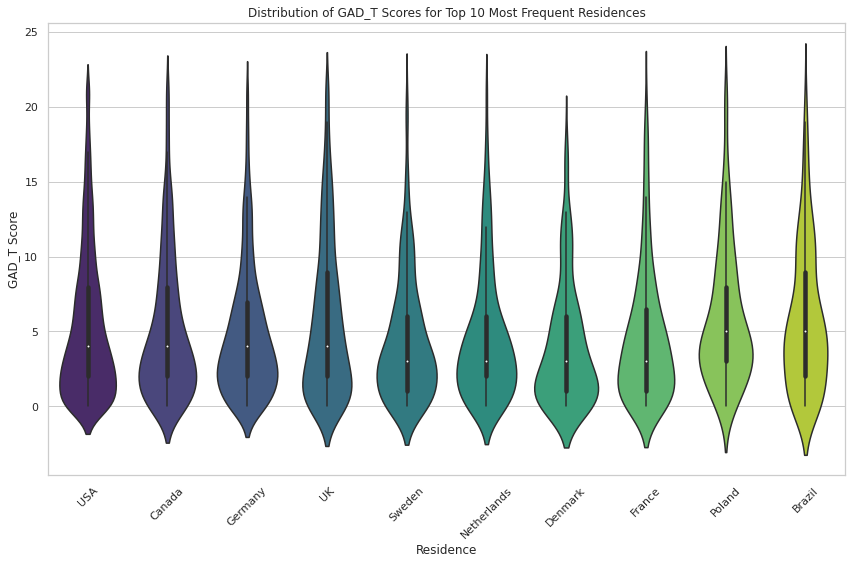

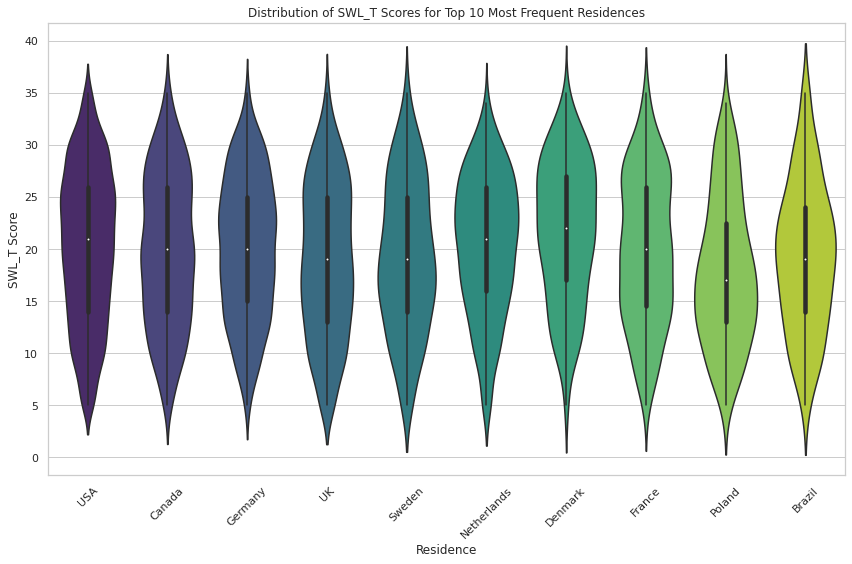

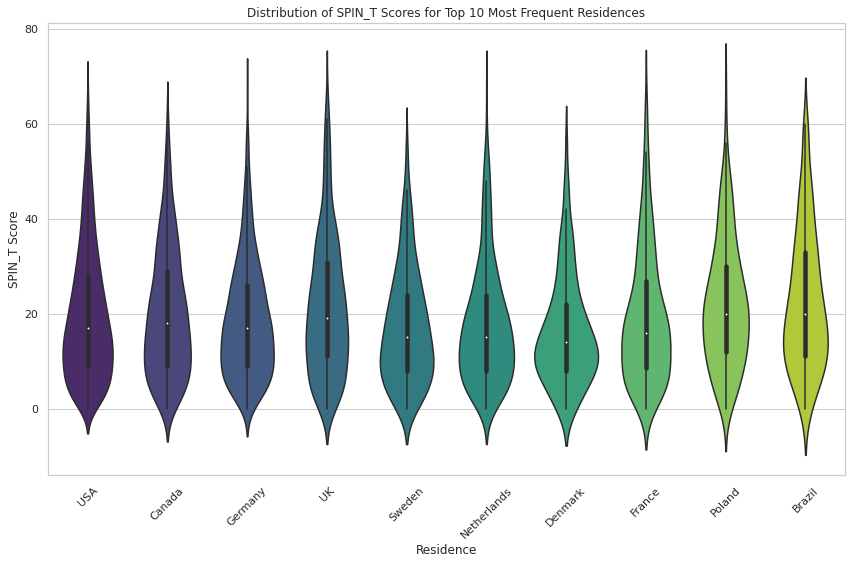

In [26]:
residence_counts = df['Residence'].value_counts()

# Step 3: Select the top 10 most frequent residences
top_10_residences = residence_counts.head(10).index

# Step 4: Filter the data for the top 10 residences
top_10_data = df[df['Residence'].isin(top_10_residences)]

# Step 5: Plotting with Seaborn
plt.figure(figsize=(12, 8))
sns.violinplot(data=top_10_data, x='Residence', y='GAD_T', palette='viridis')
plt.xlabel('Residence')
plt.ylabel('GAD_T Score')
plt.title('Distribution of GAD_T Scores for Top 10 Most Frequent Residences')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(data=top_10_data, x='Residence', y='SWL_T', palette='viridis')
plt.xlabel('Residence')
plt.ylabel('SWL_T Score')
plt.title('Distribution of SWL_T Scores for Top 10 Most Frequent Residences')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(data=top_10_data, x='Residence', y='SPIN_T', palette='viridis')
plt.xlabel('Residence')
plt.ylabel('SPIN_T Score')
plt.title('Distribution of SPIN_T Scores for Top 10 Most Frequent Residences')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [27]:
# import pandas as pd
# import statsmodels.api as sm

# Assuming you have a DataFrame called 'df' containing your data
# Replace 'Age', 'Narcissism', etc. with actual column names from your dataset
# X = df[['Age', 'Narcissism', 'Gender', ...]]  # Predictor variables

# One-hot encode the 'Gender' variable
# X = pd.get_dummies(X, columns=['Gender'], drop_first=True)  # Drop the first category to avoid multicollinearity

# y = df['Hours']  # Target variable

# # Add constant term to the predictor variables
# X = sm.add_constant(X)

# # Fit the linear regression model
# model = sm.OLS(y, X).fit()

# # Print the model summary
# print(model.summary())


Unemployed Vs SWL

In [28]:
df_filtered = df[df['Work'].isin(['Employed', 'Student at school', 'Student at college / university', 'Unemployed / between jobs'])]

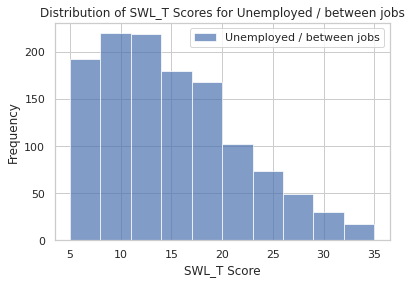

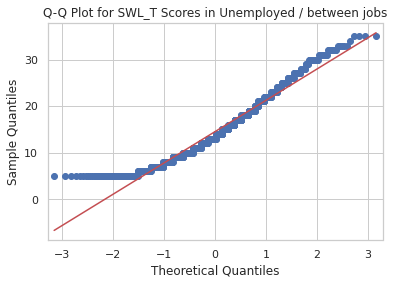

Shapiro-Wilk Test for Unemployed / between jobs: statistic=0.952, p-value=0.0000
Kolmogorov-Smirnov Test for Unemployed / between jobs: statistic=1.000, p-value=0.0000
---


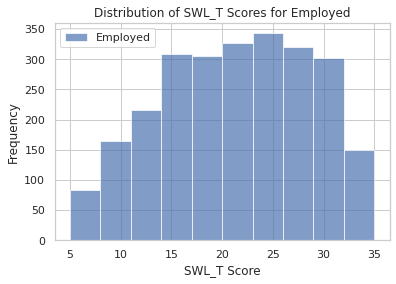

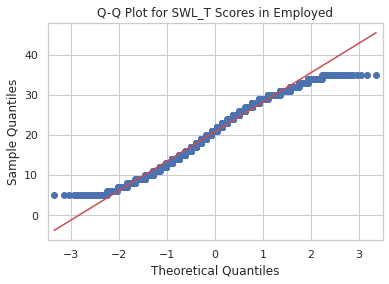

Shapiro-Wilk Test for Employed: statistic=0.978, p-value=0.0000
Kolmogorov-Smirnov Test for Employed: statistic=1.000, p-value=0.0000
---


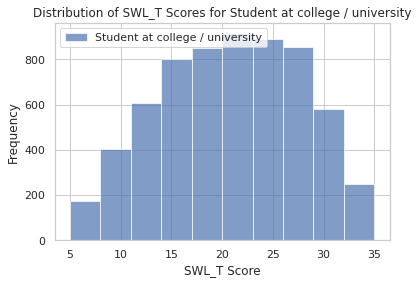

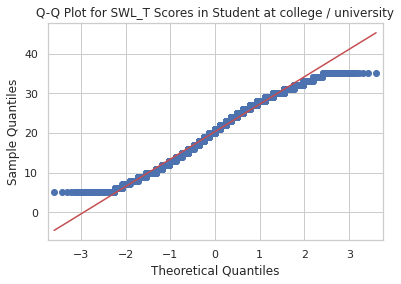

/home/hp/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



Shapiro-Wilk Test for Student at college / university: statistic=0.984, p-value=0.0000
Kolmogorov-Smirnov Test for Student at college / university: statistic=1.000, p-value=0.0000
---


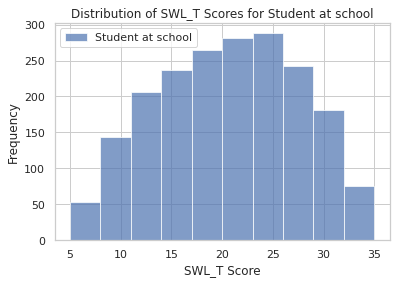

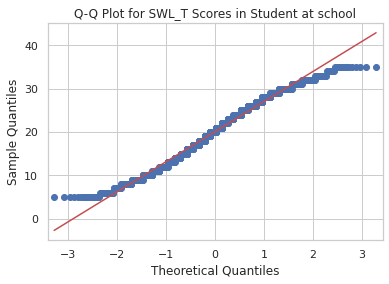

Shapiro-Wilk Test for Student at school: statistic=0.982, p-value=0.0000
Kolmogorov-Smirnov Test for Student at school: statistic=1.000, p-value=0.0000
---


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro, kstest

# Assuming you have the 'df_filtered' DataFrame from the previous step

# Loop through each Work category
for category in df_filtered["Work"].unique():
    subset_data = df_filtered[df_filtered["Work"] == category]["SWL_T"]

    # Check if there are enough data points for testing
    if len(subset_data) < 3:
        print(f"Insufficient data points for normality test in category: {category}")
        continue  # Skip to the next category

    # Histogram
    plt.hist(subset_data, bins=10, alpha=0.7, label=category)
    plt.xlabel("SWL_T Score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title(f"Distribution of SWL_T Scores for {category}")
    plt.show()

    # Q-Q Plot
    sm.qqplot(subset_data, line='s')
    plt.title(f"Q-Q Plot for SWL_T Scores in {category}")
    filename = f"qqplot_{category.replace('/', '_')}.png"  # Replace '/' with '_'
    plt.savefig(filename)  # Save Q-Q plot
    plt.show()

    # Shapiro-Wilk Test
    stat, p_value = shapiro(subset_data)
    print(f"Shapiro-Wilk Test for {category}: statistic={stat:.3f}, p-value={p_value:.4f}")

    # Kolmogorov-Smirnov Test (comparing to normal distribution)
    stat, p_value = kstest(subset_data, 'norm')
    print(f"Kolmogorov-Smirnov Test for {category}: statistic={stat:.3f}, p-value={p_value:.4f}")
    print("---")

In [ ]:
df_filtered.head()

,GADE,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,GAD_T,SWL_T,SPIN_T,Playstyle_category,whyplay_category,earn_category,whyplay_category_2
0,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,unranked,NaN,0.0,1.0,Male,25,Unemployed / between jobs,BachelorÂ (or equivalent),USA,USA,Reddit,singleplayer,1,23,5.0,Singleplayer,relaxing and having fun,fun,relaxing and having fun
1,Somewhat difficult,Other,PC,8.0,I play for fun,having fun,unranked,NaN,2.0,1.0,Male,41,Unemployed / between jobs,BachelorÂ (or equivalent),USA,USA,Reddit,multiplayer - online - with strangers,8,16,33.0,Multiplayer with Strangers,relaxing and having fun,fun,relaxing and having fun
2,Not difficult at all,Other,PC,20.0,I play for fun,improving,unranked,NaN,5.0,2.0,Male,28,Employed,BachelorÂ (or equivalent),USA,USA,Reddit,multiplayer - online - with online acquaintanc...,0,17,11.0,Multiplayer - Online,improving,fun,improving
3,Very difficult,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,unranked,NaN,1.0,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,multiplayer - online - with strangers,14,14,13.0,Multiplayer with Strangers,relaxing and having fun,fun,relaxing and having fun
4,Not difficult at all,Other,PC,30.0,I play for fun,relaxing,unranked,NaN,8.0,2.0,Male,29,Employed,High school diploma (or equivalent),USA,USA,Reddit,multiplayer - online - with online acquaintanc...,0,16,26.0,Multiplayer - Online,relaxing and having fun,fun,relaxing and having fun


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming you have the 'new_df' DataFrame and 'SPIN_T' values for each category

# Create Empty Arrays for Each Category
employed_swl_t = np.array([])
unemployed_swl_t = np.array([])
student_college_swl_t = np.array([])
student_school_swl_t = np.array([])

# Loop through DataFrame and Populate Arrays
for index, row in df.iterrows():
    work_category = row["Work"]
    swl_t_value = row["SWL_T"]
    
    if work_category == "Employed":
        employed_swl_t = np.append(employed_swl_t, swl_t_value)
    elif work_category == "Unemployed / between jobs":
        unemployed_swl_t = np.append(unemployed_swl_t, swl_t_value)
    elif work_category == "Student at college / university":
        student_college_swl_t = np.append(student_college_swl_t, swl_t_value)
    elif work_category == "Student at school":
        student_school_swl_t = np.append(student_school_swl_t, swl_t_value)

# Perform Kruskal-Wallis H Test
h_statistic, p_value = stats.kruskal(employed_swl_t, 
                                      unemployed_swl_t, 
                                      student_college_swl_t,
                                      student_school_swl_t)

print("H-statistic:", h_statistic)
print("p-value:", p_value)

H-statistic: 721.0834196134898
p-value: 5.626765084522563e-156


In [ ]:
import pandas as pd

# Convert DataFrame to long format
melted_df = pd.melt(df_filtered, id_vars=['Work'], value_vars=['SWL_T'], var_name='Category', value_name='SWL_T_value')

# Display the melted DataFrame
melted_df = melted_df.drop(columns = ["Category"])
melted_df.head()

,Work,SWL_T_value
0,Unemployed / between jobs,23
1,Unemployed / between jobs,16
2,Employed,17
3,Employed,14
4,Employed,16


In [ ]:
import pingouin as pg

# Perform Games-Howell post hoc test
posthoc = pg.pairwise_gameshowell(data=melted_df, dv='SWL_T_value', between='Work')
posthoc

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Employed,Student at college / university,20.838697,20.334491,0.504206,0.170230,2.961916,4386.619715,1.624114e-02,0.071599
1,Employed,Student at school,20.838697,20.118661,0.720036,0.214161,3.362130,4332.796775,4.338028e-03,0.100407
2,Employed,Unemployed / between jobs,20.838697,14.528754,6.309943,0.239886,26.303890,2702.325248,1.619815e-13,0.883095
3,Student at college / university,Student at school,20.334491,20.118661,0.215830,0.178874,1.206605,3280.228700,6.226725e-01,0.031169
4,Student at college / university,Unemployed / between jobs,20.334491,14.528754,5.805737,0.208989,27.780090,1813.325425,0.000000e+00,0.842977
5,Student at school,Unemployed / between jobs,20.118661,14.528754,5.589907,0.246096,22.714372,2724.867013,0.000000e+00,0.814805
